# Importing Required Libraries and reading CSV file using pandas

In [22]:
import json
import country_converter as coco
from datetime import datetime, timedelta
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Getting the data
import pandas as pd

prod = pd.read_csv("Trade updated.csv")
emissions = pd.read_csv("emission.csv")

# Merging two files to get a final data for emissions

In [23]:
emissions = pd.merge(prod,emissions,how = "left" , left_on =['Area'], right_on =['Area'])
emissions
emissions = emissions[['Regions','Area','Item_x','Emissions (CH4)','Emissions (N2O)','Emissions (CO2)']]
emissions_new= emissions.fillna(0)


In [24]:
d = emissions_new.groupby(['Area'])['Emissions (CH4)','Emissions (N2O)','Emissions (CO2)'].sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18308\3732767999.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d = emissions_new.groupby(['Area'])['Emissions (CH4)','Emissions (N2O)','Emissions (CO2)'].sum()


In [25]:
g=d.reset_index()

In [26]:
i = emissions.columns #Columns names present in emissions
df = pd.DataFrame()
x = []
y = []
for j in i:
    # For each column name the number of Total NAN values are represented
    null_value = emissions[j].isna().sum()
    y.append(null_value)
    x.append(j)
df["Columns Names"] = x
df["Total Nan Values"] = y
plt.figure(figsize=(12,12))
df.sort_values("Total Nan Values")

,Columns Names,Total Nan Values
0,Regions,957
1,Area,957
2,Item_x,957
4,Emissions (N2O),129295
3,Emissions (CH4),222522
5,Emissions (CO2),299514


<Figure size 1200x1200 with 0 Axes>

In [36]:
iso3_codes = geo_df['country'].to_list()

# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list

# There are some countries for which the converter could not find a country code. 
# We will drop these countries.
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


#  Loading data for Coordinates from geo_df

In [37]:
SHAPEFILE = "C:/Users/lenovo/Downloads/ne_10m_admin_0_countries.shp"

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']

In [38]:
# Loading coordinates of Countries
SHAPEFILE = "C:/Users/lenovo/Downloads/ne_10m_admin_0_countries.shp"

# Read shapefile using Geopandas
f = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']


# Dropping NULL values

In [46]:
merged = geo_df[['country','country_code','geometry']].merge(g, how='outer',left_on='country', right_on='Area')
a=merged.dropna()


# Defining Function for graph

In [47]:
# Set the range for the choropleth
#Making a function to run all graphs
def emissions(gas):
    title = gas
    col = gas
    source = 'Data Source: FAO Site'
    vmin = a[col].min()
    vmax = a[col].max()
    cmap = 'viridis'

    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 8))

    # Remove the axis
    ax.axis('off')
    a.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

    # Add a title
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

    # Create an annotation for the data source
    ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

    # Empty array for the data range
    sm._A = []

    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)

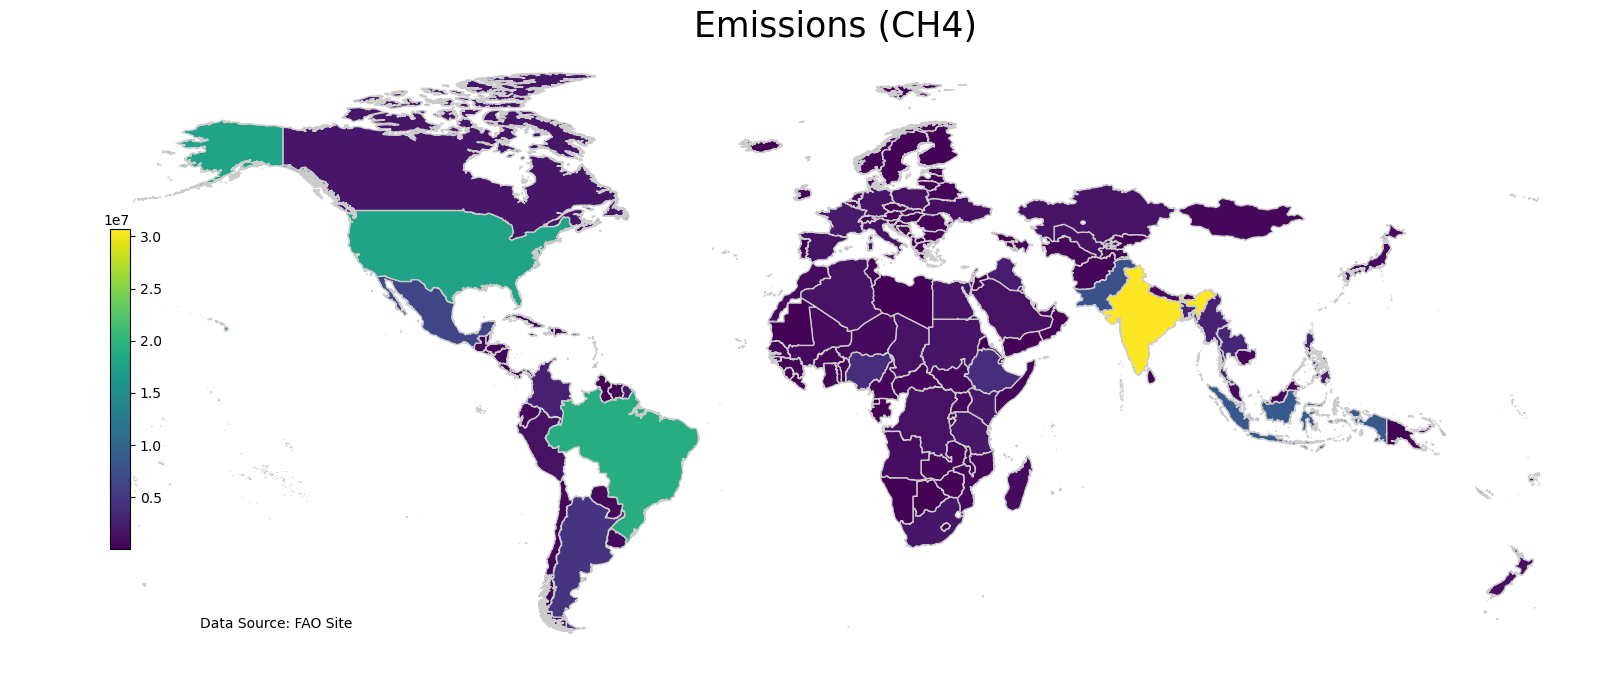

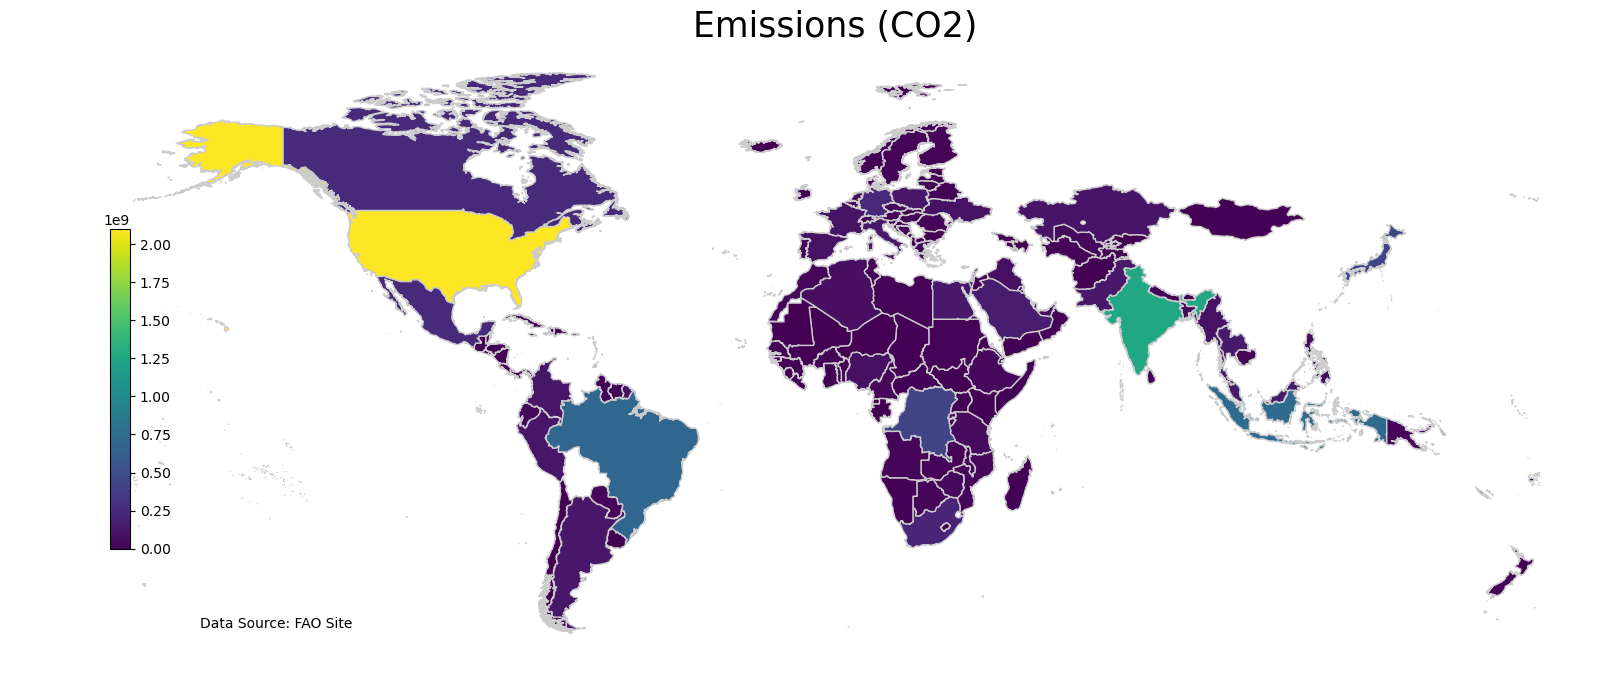

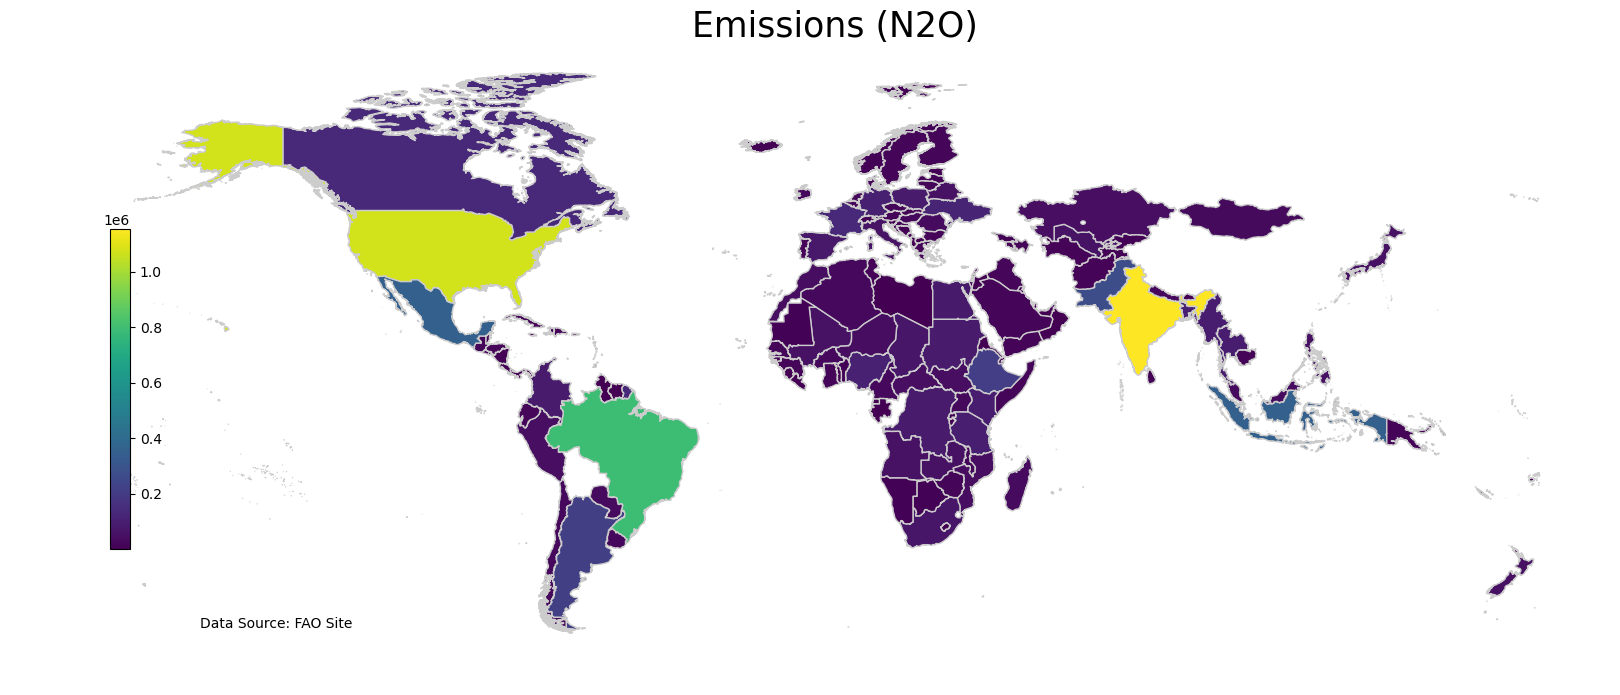

In [48]:
emissions('Emissions (CH4)')
emissions('Emissions (CO2)')
emissions('Emissions (N2O)')
